In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from utils import get_child_categories_count_by_parent_categories

In [2]:
data = pd.read_csv('../datasets/bigbasket_products/BigBasket Products.csv')
data = data[['category', 'sub_category', 'description']]
data['category'] = data['category'] + 'DELIMITER' + data['sub_category']
data = data.drop(['sub_category'], axis=1)
data['category'] = data['category'].str.split('DELIMITER')
data['category'] = data['category'].apply(lambda x: [*x[0].split(','), *x[1:]])
data['category'] = data['category'].apply(lambda x: [c.strip() for c in x])
data

,category,description
0,"[Beauty & Hygiene, Hair Care]",This Product contains Garlic Oil that is known...
1,"[Kitchen, Garden & Pets, Storage & Accessories]","Each product is microwave safe (without lid), ..."
2,"[Cleaning & Household, Pooja Needs]","A perfect gift for all occasions, be it your m..."
3,"[Cleaning & Household, Bins & Bathroom Ware]",Multipurpose container with an attractive desi...
4,"[Beauty & Hygiene, Bath & Hand Wash]",Nivea Creme Soft Soap gives your skin the best...
...,...,...
27550,"[Beauty & Hygiene, Fragrances & Deos]",Layerr brings you Wottagirl Classic fragrant b...
27551,"[Gourmet & World Food, Cooking & Baking Needs]",Puramate rosemary is enough to transform a dis...
27552,"[Gourmet & World Food, Snacks, Dry Fruits, Nuts]",We have taken the richness of Sweet Potatoes (...
27553,"[Beverages, Tea]","Tetley Green Tea with its refreshing pure, ori..."


In [3]:
data['description'].isna().sum()

115

In [4]:
data = data.dropna()

data

,category,description
0,"[Beauty & Hygiene, Hair Care]",This Product contains Garlic Oil that is known...
1,"[Kitchen, Garden & Pets, Storage & Accessories]","Each product is microwave safe (without lid), ..."
2,"[Cleaning & Household, Pooja Needs]","A perfect gift for all occasions, be it your m..."
3,"[Cleaning & Household, Bins & Bathroom Ware]",Multipurpose container with an attractive desi...
4,"[Beauty & Hygiene, Bath & Hand Wash]",Nivea Creme Soft Soap gives your skin the best...
...,...,...
27550,"[Beauty & Hygiene, Fragrances & Deos]",Layerr brings you Wottagirl Classic fragrant b...
27551,"[Gourmet & World Food, Cooking & Baking Needs]",Puramate rosemary is enough to transform a dis...
27552,"[Gourmet & World Food, Snacks, Dry Fruits, Nuts]",We have taken the richness of Sweet Potatoes (...
27553,"[Beverages, Tea]","Tetley Green Tea with its refreshing pure, ori..."


In [5]:
data['category_count'] = data['category'].str.len()

set([i for x in data[data['category_count'] == 1]['category'].values for i in x])

/tmp/ipykernel_29065/2238775429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_count'] = data['category'].str.len()


set()

In [6]:
categories_count = Counter({})

for x in data['category']:
    categories_count += Counter(x)

In [7]:
all_unique_categories = list(set([k for x in data['category'] for k in x]))

len(all_unique_categories)

104

In [8]:
parent_unique_categories = list(set([x[0] for x in data['category']]))

parent_unique_categories

['Gourmet & World Food',
 'Cleaning & Household',
 'Snacks & Branded Foods',
 'Bakery',
 'Foodgrains',
 'Beverages',
 'Kitchen',
 'Baby Care',
 'Eggs',
 'Beauty & Hygiene',
 'Fruits & Vegetables']

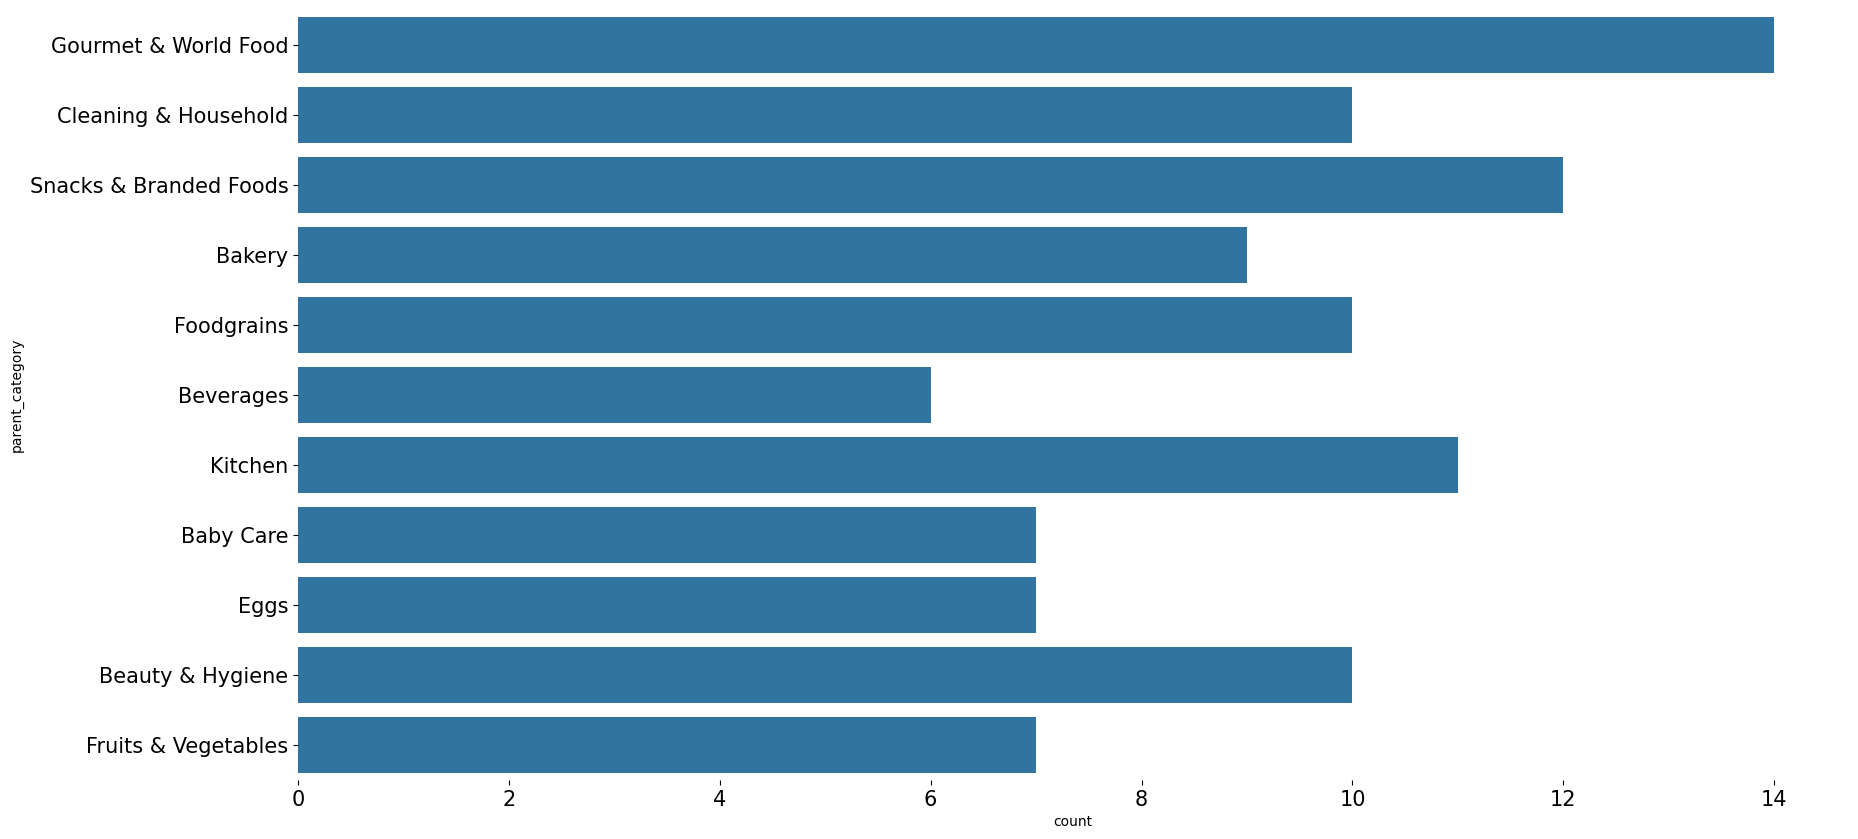

In [9]:
categories_counts = get_child_categories_count_by_parent_categories(data)
keys = categories_counts['parent_category']
# get values in the same order as keys, and parse percentage values
vals = categories_counts['count']

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [10]:
categories_counts

,parent_category,count
0,Gourmet & World Food,14
1,Cleaning & Household,10
2,Snacks & Branded Foods,12
3,Bakery,9
4,Foodgrains,10
5,Beverages,6
6,Kitchen,11
7,Baby Care,7
8,Eggs,7
9,Beauty & Hygiene,10


/tmp/ipykernel_5692/708169020.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["description"].apply(count_words))


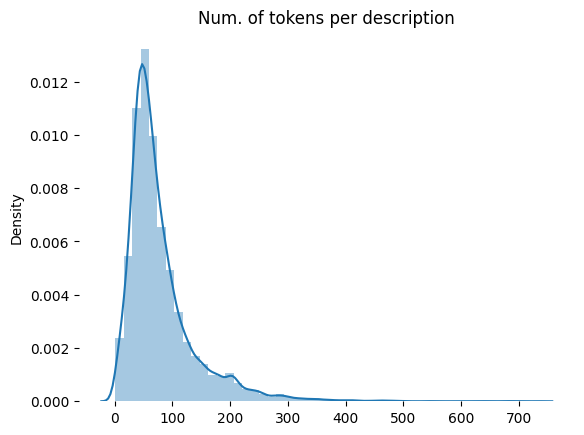

In [201]:
def count_words(x):
    return len(x.split())

ax = sns.distplot(data["description"].apply(count_words))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Num. of tokens per description")
plt.xlabel("")
plt.show()

In [202]:
data["description"].apply(count_words).describe()

count    27440.00000
mean        79.68320
std         61.43473
min          1.00000
25%         42.00000
50%         62.00000
75%         96.00000
max        734.00000
Name: description, dtype: float64

In [203]:
data = data[(data['description'].str.split().str.len() > 10) & (data['description'].str.split().str.len() <= 300)]

In [204]:
data = data.reset_index()
data = data.drop(['index'], axis=1)

In [205]:
data['parent_category'] = data['category'].apply(lambda x: x[0])

data

,category,description,category_count,parent_category
0,"[Beauty & Hygiene, Hair Care]",This Product contains Garlic Oil that is known...,2,Beauty & Hygiene
1,"[Kitchen, Garden & Pets, Storage & Accessories]","Each product is microwave safe (without lid), ...",3,Kitchen
2,"[Cleaning & Household, Pooja Needs]","A perfect gift for all occasions, be it your m...",2,Cleaning & Household
3,"[Cleaning & Household, Bins & Bathroom Ware]",Multipurpose container with an attractive desi...,2,Cleaning & Household
4,"[Beauty & Hygiene, Bath & Hand Wash]",Nivea Creme Soft Soap gives your skin the best...,2,Beauty & Hygiene
...,...,...,...,...
26568,"[Beauty & Hygiene, Fragrances & Deos]",Layerr brings you Wottagirl Classic fragrant b...,2,Beauty & Hygiene
26569,"[Gourmet & World Food, Cooking & Baking Needs]",Puramate rosemary is enough to transform a dis...,2,Gourmet & World Food
26570,"[Gourmet & World Food, Snacks, Dry Fruits, Nuts]",We have taken the richness of Sweet Potatoes (...,2,Gourmet & World Food
26571,"[Beverages, Tea]","Tetley Green Tea with its refreshing pure, ori...",2,Beverages


In [206]:
data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())

/tmp/ipykernel_5692/1204828366.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())


parent_category
Baby Care                 88.186777
Bakery                    59.355828
Beauty & Hygiene          85.714118
Beverages                 84.766311
Cleaning & Household      77.349845
Eggs                      69.792570
Foodgrains                71.625386
Fruits & Vegetables       50.161871
Gourmet & World Food      76.416648
Kitchen                   78.102434
Snacks & Branded Foods    69.776600
dtype: float64

/tmp/ipykernel_5692/3968563391.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  keys = list(data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean()).keys())
/tmp/ipykernel_5692/3968563391.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vals = [data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[k] for k in keys]
/tmp

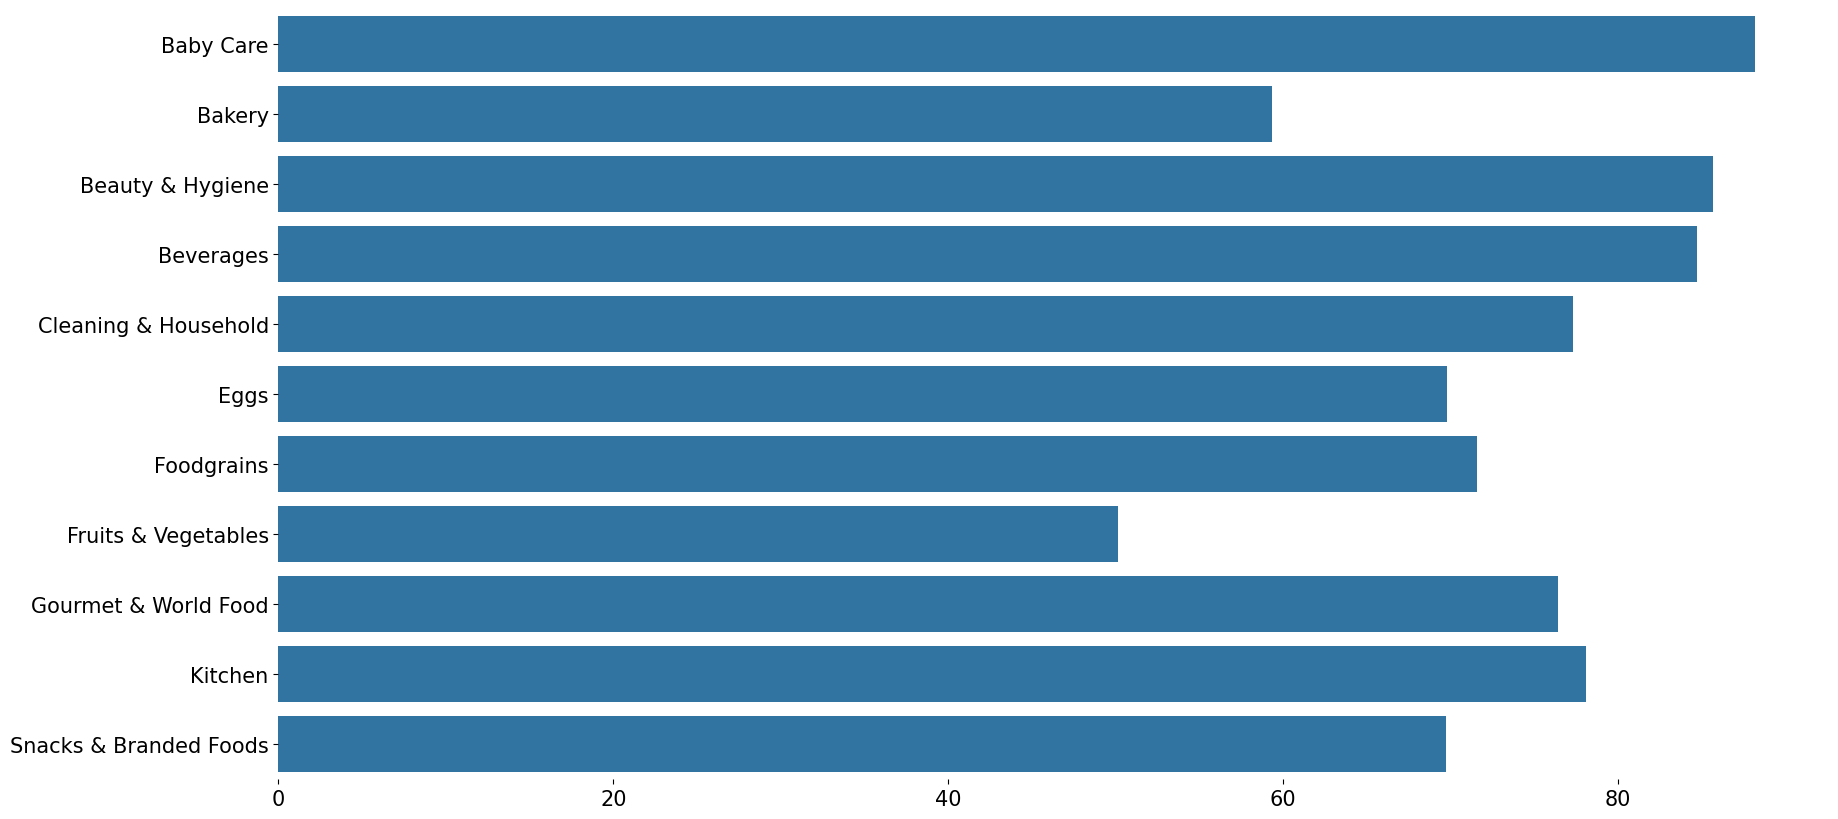

In [207]:
keys = list(data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean()).keys())
# get values in the same order as keys, and parse percentage values
vals = [data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[k] for k in keys]

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [208]:
import statistics

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def confidence_interval(data, confidence=0.95):
  dist = statistics.NormalDist.from_samples(data)
  z = statistics.NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h

# confidence_interval(data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])))
a = data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens]))
scipy.stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=scipy.stats.sem(a))

(5.150183427379726, 5.163314658704841)

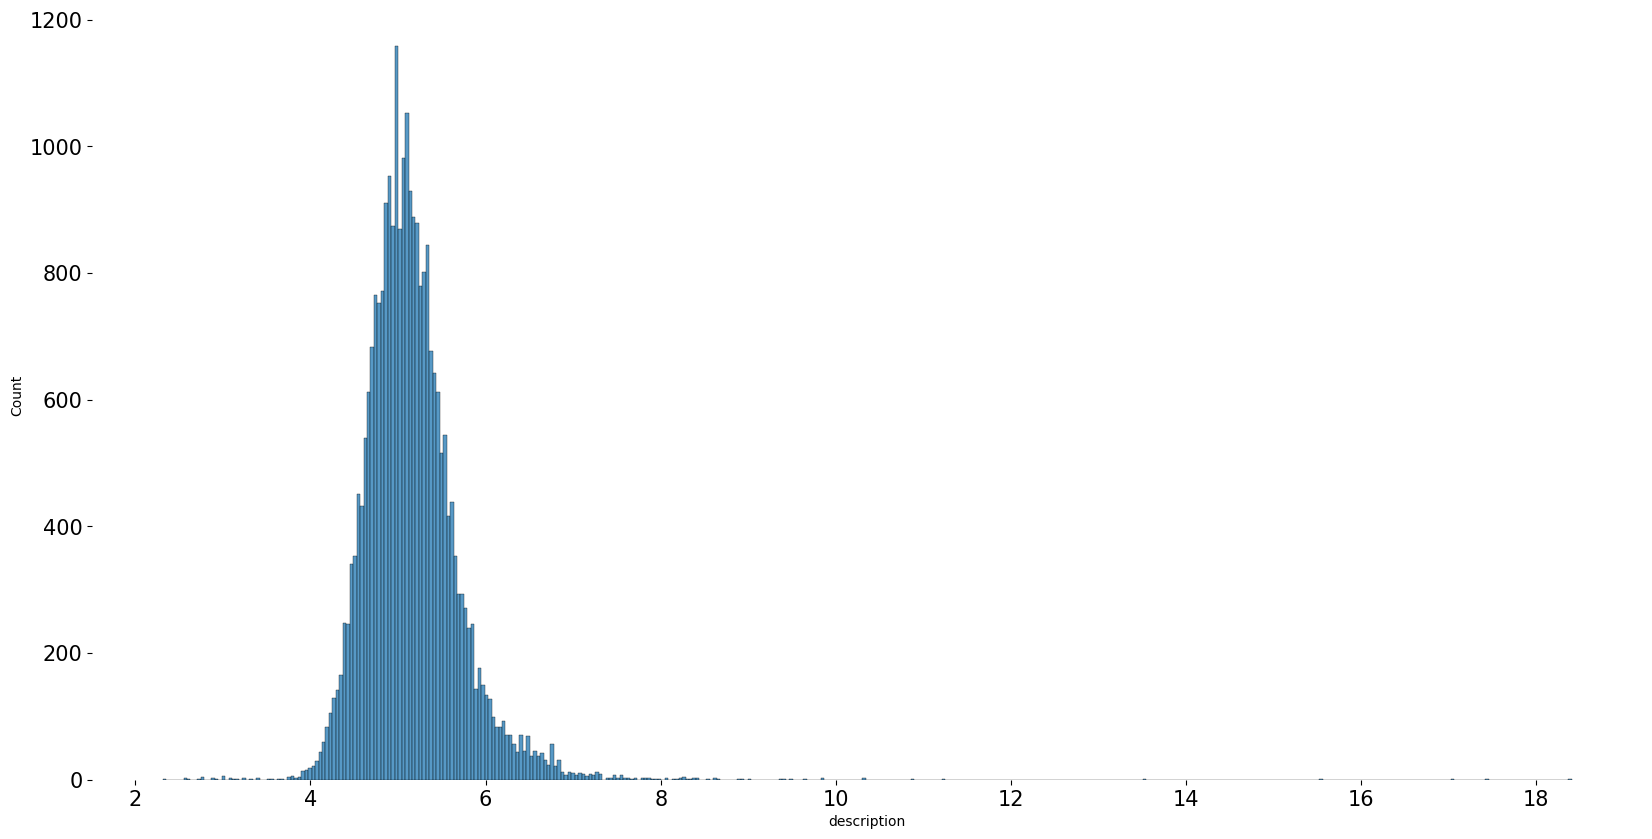

In [209]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])))
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [210]:
data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])).describe()

count    26573.000000
mean         5.156749
std          0.546044
min          2.312500
25%          4.821053
50%          5.099010
75%          5.411765
max         18.406250
Name: description, dtype: float64

In [229]:
chars_count_per_parent_category = data.groupby(['parent_category']) \
    .apply(lambda row: row['description'].str.split().values) \
    .apply(lambda x: np.mean([len(j) for i in x for j in i]))


chars_count_per_parent_category

/tmp/ipykernel_5692/1600729232.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row['description'].str.split().values) \


parent_category
Baby Care                 5.139692
Bakery                    5.066977
Beauty & Hygiene          5.217685
Beverages                 4.992555
Cleaning & Household      5.124470
Eggs                      5.038859
Foodgrains                5.109742
Fruits & Vegetables       5.686196
Gourmet & World Food      5.056509
Kitchen                   5.010195
Snacks & Branded Foods    4.980047
dtype: float64

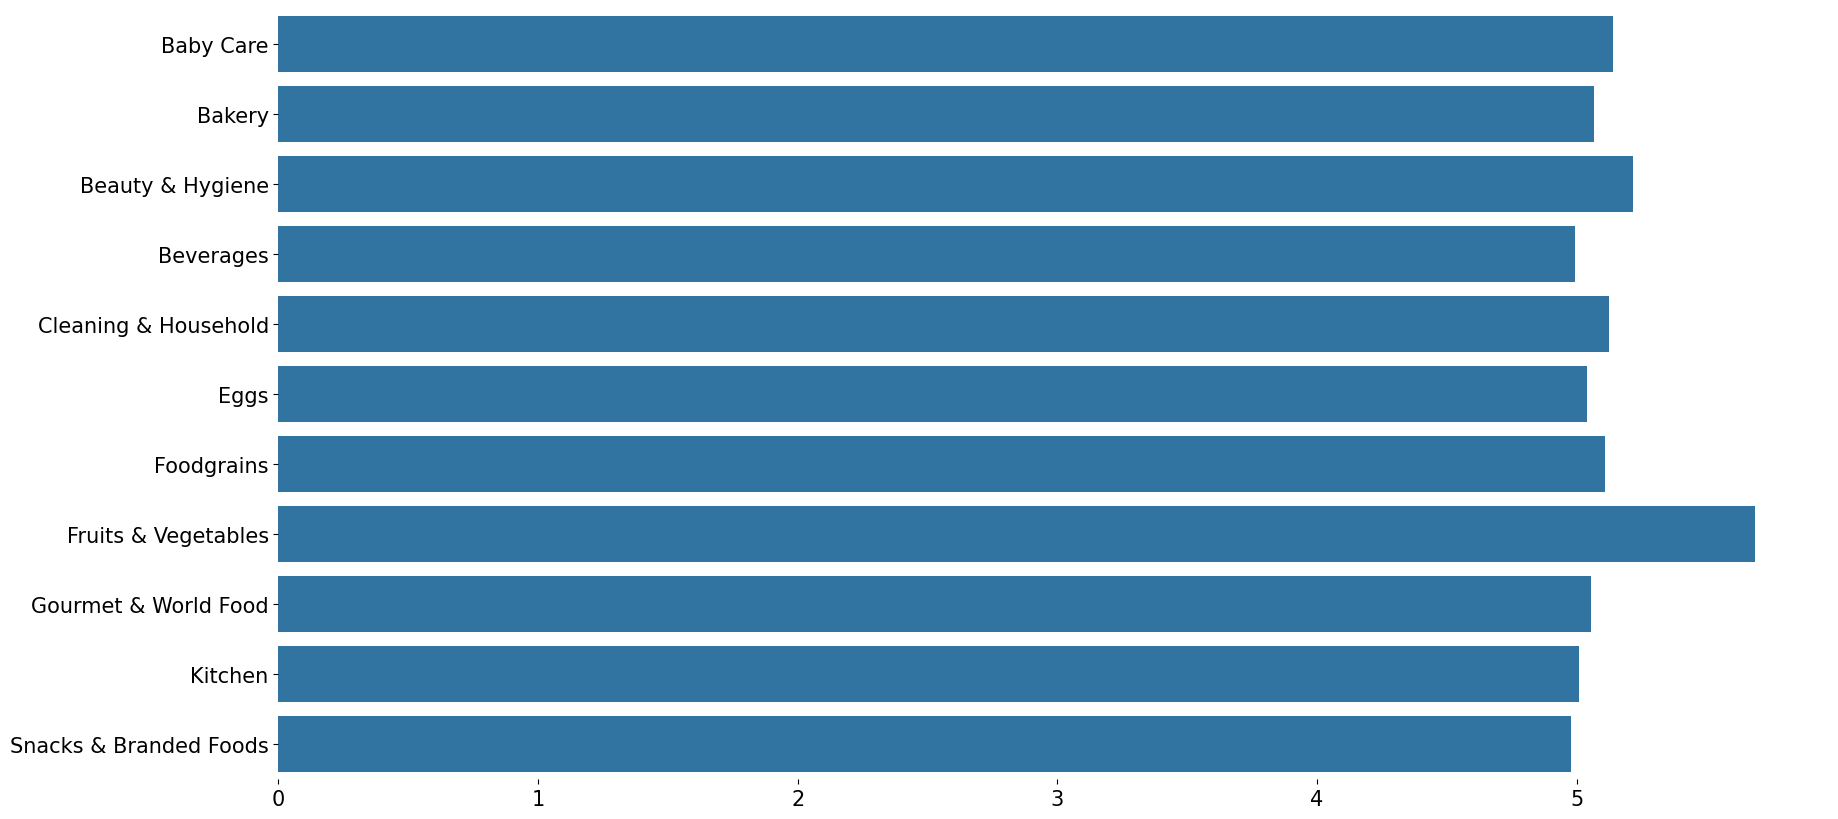

In [232]:
keys = list(chars_count_per_parent_category.keys())
# get values in the same order as keys, and parse percentage values
vals = list(chars_count_per_parent_category.values)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [ ]:
words_counter = Counter()

for tokens in data['description'].str.split():
    words_counter += Counter(tokens)

words_counter_x, words_counter_y= [], []

for word,count in words_counter.most_common(15):
    words_counter_x.append(word)
    words_counter_y.append(count)

In [125]:
words_counter.most_common(15)

[('and', 91710),
 ('the', 61898),
 ('of', 49164),
 ('is', 44653),
 ('a', 43702),
 ('to', 41378),
 ('with', 30600),
 ('in', 28004),
 ('for', 26840),
 ('your', 23906),
 ('It', 18936),
 ('are', 15828),
 ('that', 14564),
 ('you', 13928),
 ('it', 12347)]

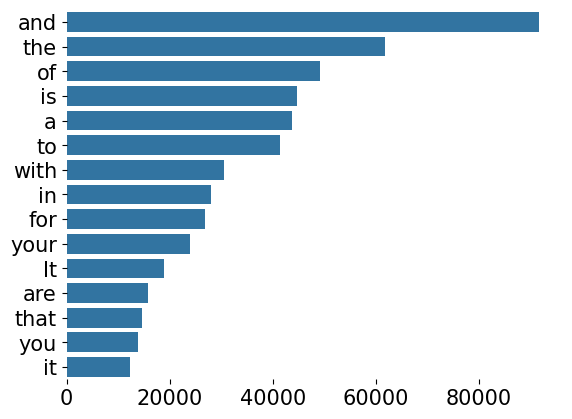

In [124]:
ax = sns.barplot(x=words_counter_y, y=words_counter_x)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

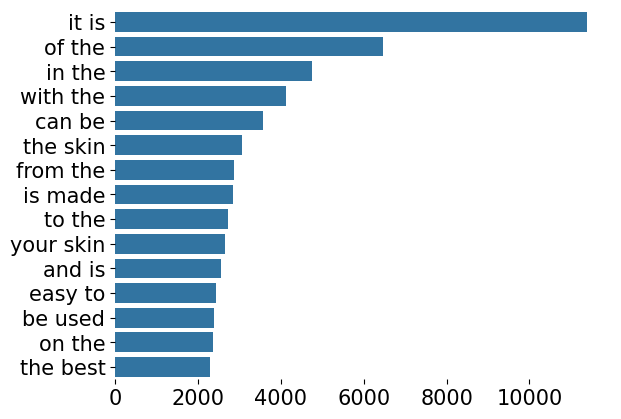

In [133]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

top_n_bigrams=get_top_ngram(data['description'], 2)[:15]
x,y=map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y,y=x)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [134]:
top_n_bigrams

[('it is', 11401),
 ('of the', 6468),
 ('in the', 4752),
 ('with the', 4114),
 ('can be', 3565),
 ('the skin', 3062),
 ('from the', 2858),
 ('is made', 2842),
 ('to the', 2716),
 ('your skin', 2656),
 ('and is', 2561),
 ('easy to', 2442),
 ('be used', 2397),
 ('on the', 2374),
 ('the best', 2297)]